# Twitter Sentiment Analysis using NLP

In [1]:
# Importing the libraries
import tweepy
import re
import pickle
import matplotlib.pyplot as plt
from tweepy import OAuthHandler

In [13]:
# Please change with your own consumer key, consumer secret, access token and access secret
# Initializing the keys
# Twitter Credentials
consumer_key = "Your Consumer Key"
consumer_secret = "Your secret Key"
access_token = "Your Access Token"
access_token_secret = "Your Acess Token Secret" 

In [4]:
# Initializing the tokens
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
args = ['Barcelona'];
api = tweepy.API(auth,timeout=10)

In [5]:
# Fetching the tweets
list_tweets = []
query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent',geocode="22.1568,89.4332,500km").items(100):
        list_tweets.append(status.text)

In [6]:
print(list_tweets)

['I Love FC Barcelona 😘😘 https://t.co/aG3pvnrIwC', "So Liverpool play Barcelona in the Semi Finals and predictions are fun. Let's do this.\nFirst leg : Liverpool 2:1 Ba… https://t.co/8MAKlvPz6J", "@ChampionsLeague Barcelona vs Ajax..Would be a great match to watch.Because Ajax's play style have been similar to old Barca's.", 'Barcelona against weekend Champions League games: Bartomeu | 2019-04-19 | https://t.co/990q9EamvZ https://t.co/CABhO2PUod', "@DaveOCKOP Are Barcelona that stupid... Even after that kind of performance they didn't sign van dijk...", '@RafaelNadal Sir this year you will win your 12th edition of French open , Barcelona open and Monte Carlo masters .#Vamos', '@ChampionsLeague \nI like Liverpool again I love Barcelona...\nIn this match I am supporting both..', '@BajrangbaliBha1 @akshaypasu Ah! All I can say is that doing quadruple is something very difficult task, now City c… https://t.co/8iV0jbZoNW', 'Are all Barcelona fans by born Dumb? https://t.co/ZcAXWraQvf', '@st

In [7]:
# Loading the vectorizer and classfier
with open('classifier.pickle','rb') as f:
    classifier = pickle.load(f)
    
with open('tfidfmodel.pickle','rb') as f:
    tfidf = pickle.load(f)  

In [8]:
total_pos = 0
total_neg = 0

In [9]:
for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    sent = classifier.predict(tfidf.transform([tweet]).toarray())
    if sent[0] == 1:
        total_pos += 1
    else:
        total_neg += 1

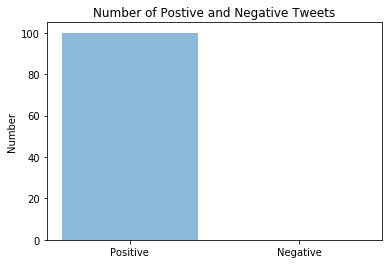

In [16]:
# Visualizing the results
import matplotlib.pyplot as plt
import numpy as np
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))
plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and Negative Tweets')
plt.show()